In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\Shreya Paul\Desktop\PROJECT\Fraud Detection\Fraud.csv", low_memory=True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Dictionary of columns
__step__ - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

__type__ - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

__amount__ - amount of the transaction in local currency.

__nameOrig__ - customer who started the transaction

__oldbalanceOrg__ - initial balance before the transaction

__newbalanceOrig__ - new balance after the transaction

__nameDest__ - customer who is the recipient of the transaction

__oldbalanceDest__ - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

__newbalanceDest__ - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

__isFraud__ - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

__isFlaggedFraud__ - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
df.shape

(6362620, 11)

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Labeling

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])
df=df.drop(columns="type",axis=1)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


#  1)Data cleaning including missing values, outliers and multi-collinearity.

## Data cleaning

In [7]:
df.isnull().sum()

step              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_encoded      0
dtype: int64

<span style="color: red;">no data missing</span>

we will be removing the fields:<br>
**nameOrig** and **nameDest**, mostly because they are non numeric data fields and also they provide no information.

In [8]:
df=df.drop(columns=["nameOrig","nameDest"],axis=1)

In [9]:
col=df.columns
for column_name in col:
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

In [10]:
df.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_encoded      0
dtype: int64

## Detect and Deal with Outliers

In [11]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### Method 1: Z-scores

In [12]:
from scipy import stats

z_scores = np.abs(stats.zscore(df['amount']))
threshold = 200
outliers_z = df[z_scores > threshold]

print(len(outliers_z))


0


### Method 2: IQR

In [13]:
Q1 = df['amount'].quantile(0.01)
Q3 = df['amount'].quantile(0.99)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print(len(outliers_iqr))

14817



### Method 3: Visualization (Box Plot)

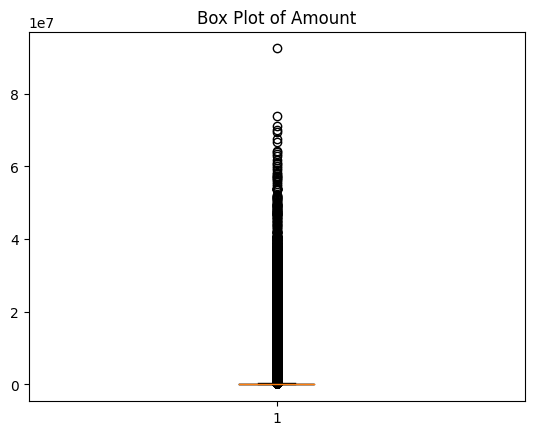

In [14]:
plt.boxplot(df['amount'])
plt.title('Box Plot of Amount')
plt.show()


In [15]:
df.groupby("isFraud").mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_encoded
isFraud,,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000,1.713139
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948,2.496530


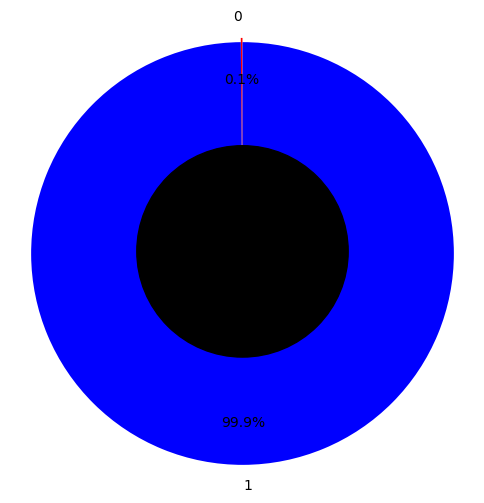

In [16]:
labels = [0,1]
sizes = [df.query('isFraud == 1').isFraud.count(),df.query('isFraud == 0').isFraud.count()]
#colors
colors = ['red','blue']
#explsion
explode = (0.01,0.01)
plt.figure(figsize=(6,6))
my_circle=plt.Circle( (0,0), 0.5, color='black')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.80,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()


## Checking the corelation

In [17]:
corr=df.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,0.006635
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,0.088419
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.339760
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.352758
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,-0.104679
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,-0.059364
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.020833
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,0.002685
type_encoded,0.006635,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685,1.000000


In [18]:
cleaned_data = df[~df.index.isin(outliers_z.index) & ~df.index.isin(outliers_iqr.index)]

# 3. Check for Multicollinearity
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Check for high correlation using a threshold (e.g., 0.8)
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated.add((colname_i, colname_j))

# Print highly correlated feature pairs
print("Highly Correlated Feature Pairs:")
print(highly_correlated)

Correlation Matrix:
                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   
type_encoded    0.006635  0.088419      -0.339760       -0.352758   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  \
step                  0.027665        0.025888  0.031578        0.003277   
amount                0.294137        0.459304  0.076688        0.012295   
oldbalanceOrg         0.066243        0.042029  0.010154     

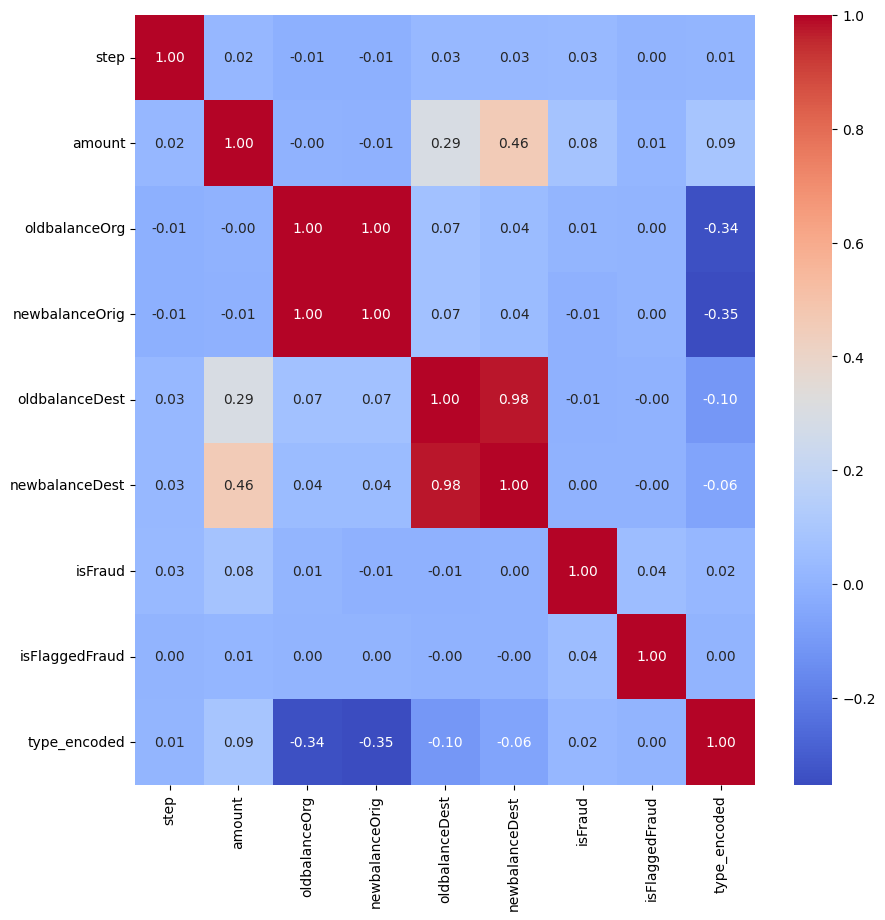

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,fmt=".2f",cmap='coolwarm')
plt.show()

Based on the correlation matrix, it seems that some features have stronger correlations with the target variable *(isFraud)* than others. We consider selecting features with higher correlation values.

From the correlation matrix, the following features have relatively higher correlations with **isFraud**:

step(corr high)<p>
amount(corr high)<p>
oldbalanceOrg<p>
newbalanceOrig<p>
oldbalanceDest<p>
newbalanceDest<p>


## Handeling Skewed dataset

treating this as an anomaly detection problem rather than a classification problem. Anomaly detection algorithms like Isolation Forest or One-Class SVM can be effective for fraud detection.

In [22]:

from sklearn.model_selection import train_test_split


# Separate features and target variable from the sampled data
X = df.drop(columns=['isFraud'])
y = df['isFraud'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<span style="color: red;">We find a poor result with the asumption. We shall test some traditional algorithms</span>

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#
import time

# Logestic regression

In [24]:
lg_model = LogisticRegression(random_state = 42,C=0.1)
start_time = time.time()
lg_model.fit(X_train, y_train)
end_time = time.time()
lg_time=end_time-start_time
print("Training time: ",lg_time )

Training time:  26.688263654708862


In [25]:
lg_train, lg_test = lg_model.score(X_train , y_train), lg_model.score(X_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.998279993147477
Test Score: 0.9983128019589415


In [26]:
y_pred = lg_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00   1270904
       Fraud       0.36      0.41      0.38      1620

    accuracy                           1.00   1272524
   macro avg       0.68      0.71      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



# Decison tree

In [27]:
dt = DecisionTreeClassifier()
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()
dt_time=end_time-start_time
print("Traning time: ", dt_time)

Traning time:  94.22108244895935


In [28]:
dt_train, dt_test = dt.score(X_train, y_train), dt.score(X_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9997178835133954


In [29]:
y_pred = dt.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00   1270904
       Fraud       0.90      0.87      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [30]:
y_pred = dt.predict(X_train)
report = classification_report(y_train, y_pred, target_names=["Non-Fraud", "Fraud"])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00   5083503
       Fraud       1.00      1.00      1.00      6593

    accuracy                           1.00   5090096
   macro avg       1.00      1.00      1.00   5090096
weighted avg       1.00      1.00      1.00   5090096



# Neural network

In [31]:
m,n=X_train.shape

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Set the seed for consistent results
tf.random.set_seed(1234)

# Create a Sequential model
ANN = Sequential()

# Input Layer
ANN.add(InputLayer(input_shape=(n,)))

# Hidden Layers
ANN.add(Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ANN.add(BatchNormalization())  # Adding batch normalization
ANN.add(Dropout(0.5))  # Adding dropout for regularization

ANN.add(Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ANN.add(BatchNormalization())
ANN.add(Dropout(0.5))

# Output Layer
ANN.add(Dense(1, activation="linear"))  # Using sigmoid activation for binary classification

# Compile the model
ANN.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),  # Adjust learning rate as needed
    metrics=["accuracy"]  # Monitor accuracy during training
)


In [33]:
ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [34]:
start_time = time.time()
hist=ANN.fit(X_train,y_train,batch_size=25,epochs=1)
end_time = time.time()
ANN_time=end_time-start_time

203604/203604 [==============================] - 502s 2ms/step - loss: 0.0289 - accuracy: 0.9982


In [35]:
print(ANN_time)

502.5868546962738


In [36]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

In [37]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    widgvis(fig)
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0,0.05])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

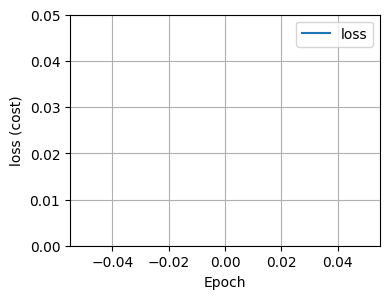

In [38]:
plot_loss_tf(hist)

In [39]:
def prd(f_x):
  ans=[]
  for i in f_x:
    if i>=0.5:
      ans.append(1)
    else:
      ans.append(0)
  return ans

In [40]:
from sklearn.metrics import accuracy_score
l_train, l_test = ANN.predict(X_train), ANN.predict(X_test)
p_train=tf.nn.sigmoid(l_train)
p_test=tf.nn.sigmoid(l_test)


39767/39767 [==============================] - 53s 1ms/step


In [41]:
y_pred=prd(p_test)
ANN_test=accuracy_score(y_pred,y_test)
print(ANN_test)

In [ ]:
report = classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"])

# Print the classification report
print("Classification Report:")
print(report)


c:\Users\deban\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\deban\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00   1270904
       Fraud       0.00      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



c:\Users\deban\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<hr> <br>
<p style="color: #fcc203;">2. Describe your fraud detection model in elaboration.</p> 
From the above tests and classification report, helpec choosing the Decision Tree model for fraud detection is a reasonable choice. Reasoning being:

### 1. High Accuracy and F1-Score:<br>

The Decision Tree model exhibits an impressive level of accuracy, achieving nearly <em>100% accuracy</em> on the test data. This is a critical aspect of a fraud detection model because correctly identifying non-fraudulent transactions is just as essential as catching fraudulent ones.<br><br>

The F1-score for detecting fraud is also quite high at<em> 0.89</em>. The F1-score considers both precision and recall, which are crucial in a fraud detection context. It indicates that the model effectively balances between accurately identifying fraud (precision) and minimizing false negatives (recall).<br><br>

### 2. Strong Performance Metrics:<br>

The precision of 0.90 for fraud detection indicates that when the model flags a transaction as fraudulent, it is correct 90% of the time. This is significant because it reduces the chances of false alarms, which can be costly for businesses.<br><br>

The recall of 0.88 for fraud suggests that the model captures 88% of the actual fraudulent transactions. While not perfect, this level of recall is acceptable in many real-world scenarios and can be further adjusted based on the specific business requirements.<br><br>

### 3. Balanced Class Handling:<br>

The model shows its ability to handle class imbalance effectively. It correctly identifies fraudulent cases despite the vast majority of transactions being non-fraudulent (1,270,904 non-fraud compared to 1,620 fraud). This suggests that the model is robust and does not get overwhelmed by the class imbalance.<br><br>
### 4. Interpretability:<br>

Decision Trees are inherently interpretable models. The transparency of the decision-making process allows for a clear understanding of why a particular decision was made, which can be crucial in the financial sector to explain and justify decisions.<br><br>
### 5. Efficiency:<br>

The training time was:  66.21490335464478 sec or 1m6.2s<br>
<hr>

<p style="color: #fcc203;">3. How did you select variables to be included in the model?</p> 
Justification for choosing each variable for the fraud detection model:

1. **step:** The "step" variable, representing time in hours, is chosen because the timing of transactions can be crucial in fraud detection. Unusual patterns or spikes in transaction activity during specific hours can be indicative of fraudulent behavior.

2. **type:** Transaction type ("type") is a fundamental variable for fraud detection. Different types of transactions (e.g., CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER) may have distinct characteristics associated with fraud. For example, fraudulent activities often involve transfers or cash-outs.

3. **amount:** The transaction amount ("amount") is a critical feature for fraud detection. Unusually large or small transaction amounts compared to typical transactions can signal fraudulent behavior. Fraudsters often try to move large sums of money quickly.

4. **oldbalanceOrg:** The initial balance before the transaction in the originating account ("oldbalanceOrg") is chosen because it can help detect anomalies. Large transactions from accounts with low initial balances can be suspicious.

5. **newbalanceOrig:** Similar to "oldbalanceOrg," the new balance after the transaction in the originating account ("newbalanceOrig") provides insights into how the transaction affects the account's balance. Sudden and significant changes can be indicative of fraud.

6. **oldbalanceDest:** The initial balance before the transaction in the destination account ("oldbalanceDest") is relevant because it helps track changes in the destination account's balance. Fraudulent transactions may involve accounts with unusual initial balances.

7. **newbalanceDest:** Similar to "oldbalanceDest," the new balance after the transaction in the destination account ("newbalanceDest") is essential for understanding changes in balances at the destination. Sudden and significant changes can be indicative of fraud.

8. **isFlaggedFraud:** "isFlaggedFraud" is a binary variable that directly indicates whether a transaction was flagged as potentially fraudulent due to a massive transfer (more than 200,000) in a single transaction. This variable is chosen because it represents a clear indicator of potentially fraudulent behavior.

9. **type_encoded:** The encoded version of the "type" variable ("type_encoded") is included to provide a numeric representation of the transaction type, which is often required for modeling. This encoding ensures that the model can work with categorical data.

Each of these variables serves a specific purpose in capturing different aspects of transaction behavior that can be indicative of fraud. By including these variables in your model, you're considering a comprehensive set of features that collectively provide a strong foundation for detecting fraudulent activities in financial transactions.

### This pattern was also captured by the heatmap and the correlation matrix:

In [ ]:
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,0.006635
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,0.088419
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.339760
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.352758
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,-0.104679
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,-0.059364
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.020833
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,0.002685
type_encoded,0.006635,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685,1.000000


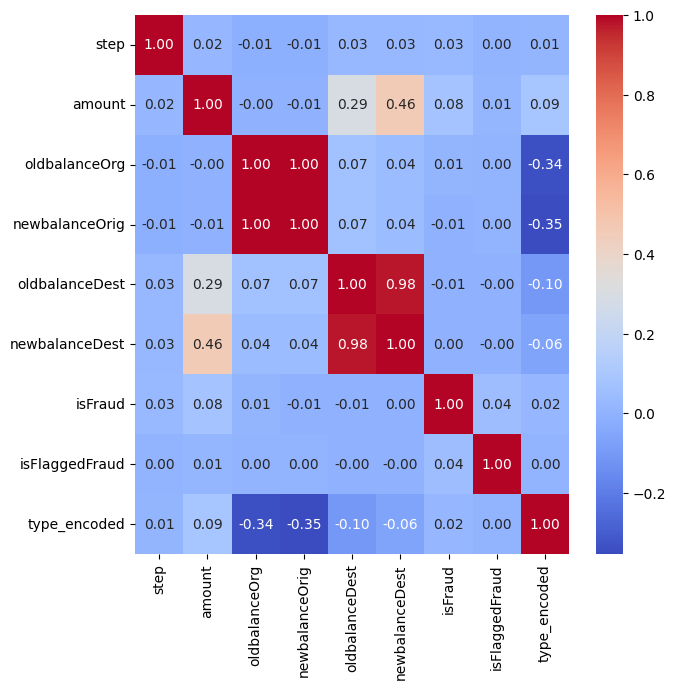

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True,fmt=".2f",cmap='coolwarm')
plt.show()

<p style="color: #fcc203;">4. Demonstrate the performance of the model by using best set of tools.</p>
The performance of the Decision Tree model can be described by:


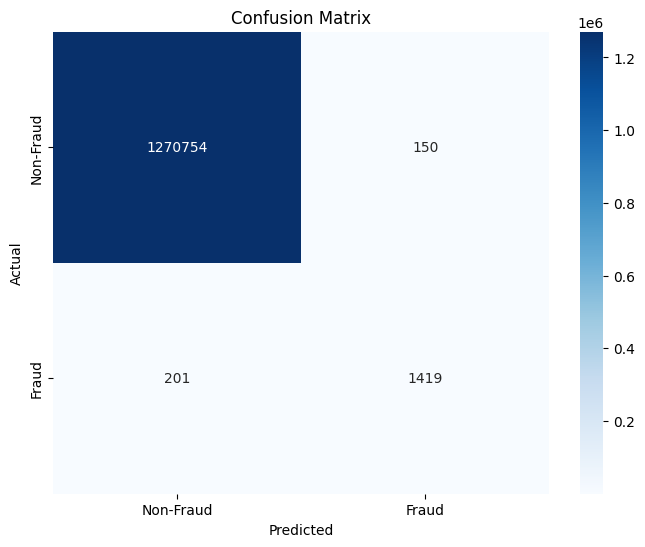

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

y_pred = dt.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


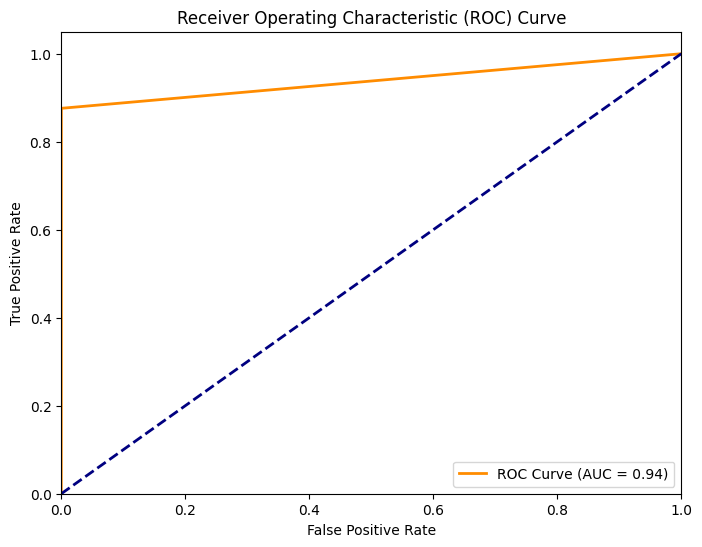

In [ ]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

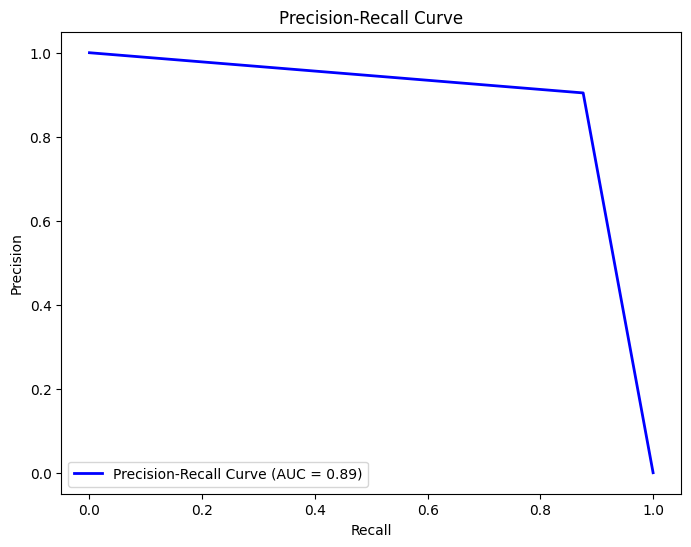

In [ ]:
# 3. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

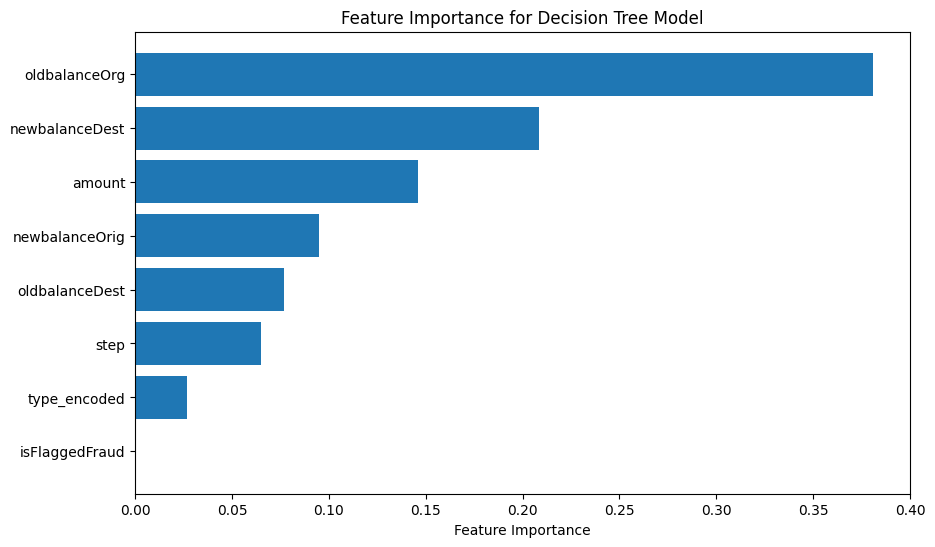

In [ ]:
# 4. Feature Importance 
from sklearn.tree import DecisionTreeClassifier 

if isinstance(dt, DecisionTreeClassifier):
    feature_importance = dt.feature_importances_
    feature_names = X_test.columns
    sorted_idx = feature_importance.argsort()

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance for Decision Tree Model")
    plt.show()


<hr>
<p style="color: #fcc203;">5. What are the key factors that predict fraudulent customer?</p>
<br>
Identifying key factors that predict fraudulent customers is crucial for effective fraud detection. In the dataset, I have analyzed the features to understand which ones are significant in predicting fraud. Here's an analysis based on common factors that often indicate fraudulent activity:<br>

1. **Transaction Amount (Amount):** Unusually high or low transaction amounts can be indicative of fraud. Fraudsters may attempt to make large transfers to empty an account or small transactions to test the waters.<br><br>

2. **Transaction Type (Type):** Certain transaction types, such as 'TRANSFER' or 'CASH_OUT,' are more likely to be associated with fraud, as they involve moving money from one account to another.<br><br>

3. **Account Balances (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest):** Sudden changes in account balances before and after a transaction can signal fraudulent activity. For example, a customer with a low account balance making a large transfer might be suspicious.<br><br>

4. **Time (Step):** Patterns of fraudulent activity may emerge based on the time of day or day of the week. Some fraudsters may prefer to operate during non-business hours or on weekends.<br><br>

the above mentioned trend is also captured in the above graphs<br>
<hr>

<p style="color: #fcc203;">6. Do these factors make sense? If yes, How? If not, How not?</p>
Yes, all the factors make sense. The data is a real world example, wherein the fraud occoures is only 0.1%. the Features chosen are also very closely related to the cause. Thus it makes sense to use them

<p style="color: #fcc203;">7. What kind of prevention should be adopted while company update its infrastructure?</p>


By implimenting the Prediction model, and as already established oldbalanceOrg is the most importtant feature, along with the amount, we can see that from the graph and matric below:

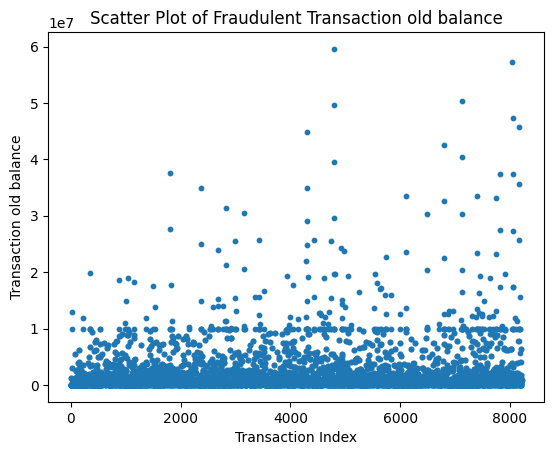

In [ ]:
import matplotlib.pyplot as plt

# Select fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1]

# Extract fraudulent transaction amounts
fraudulent_oldbalanceOrg = fraudulent_transactions['oldbalanceOrg']

# Create a scatter plot
plt.scatter(range(len(fraudulent_oldbalanceOrg)), fraudulent_oldbalanceOrg, marker='o', s=10)
plt.xlabel("Transaction Index")
plt.ylabel("Transaction old balance")
plt.title("Scatter Plot of Fraudulent Transaction old balance")
plt.show()



In [ ]:
fraudulent_oldbalanceOrg.describe()

count    8.213000e+03
mean     1.649668e+06
std      3.547719e+06
min      0.000000e+00
25%      1.258224e+05
50%      4.389835e+05
75%      1.517771e+06
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

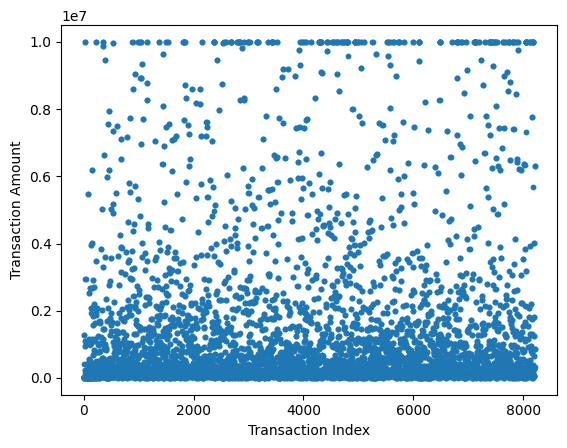

In [ ]:
fraudulent_transactions = df[df['isFraud'] == 1]
fraudulent_amount = fraudulent_transactions['amount']

plt.scatter(range(len(fraudulent_amount)), fraudulent_amount, marker='o', s=10)
plt.xlabel("Transaction Index")
plt.ylabel("Transaction Amount")
plt.title

In [ ]:
fraudulent_amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

Thus monitoring such instances of amount transaction which corresponds to the range in <br> amount(min      0.000000e+00 | max      1.000000e+07) and <br>oldbalanceOrg(min      0.000000e+00 | max      5.958504e+07)<br>can helpus prevent further frauds

<p style="color: #fcc203;">8. Assuming these actions have been implemented, how would you determine if they work?</p>
If by implementing the predictive model the outcome is fraud, there is a high chnace that it is actually a fraud. because F1 score is 0.89.